In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv("./xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [21]:
## Reading dataset general information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [22]:
# convert text data to numeric based on unique values
def convert_text_to_numeric(df):
    # make empty dataframe
    new_df = pd.DataFrame()
    for column in df.columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            print(unique_elements)
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
            new_df[column] = df[column]
    return df, new_df

df5_numeric, df_categorical = convert_text_to_numeric(data.copy())
df_categorical

{'M', 'F'}
{'SaudiArabia', 'Jordan', 'Iran', 'USA', 'lebanon', 'Lybia', 'venzuela', 'Tunis', 'Syria', 'Morocco', 'Egypt', 'Iraq', 'Palestine', 'KW'}
{'SaudiArabia', 'Jordan', 'Iran', 'USA', 'lebanon', 'Lybia', 'venzuela', 'Tunis', 'Syria', 'Morocco', 'Egypt', 'KuwaIT', 'Iraq', 'Palestine'}
{'lowerlevel', 'MiddleSchool', 'HighSchool'}
{'G-08', 'G-05', 'G-04', 'G-07', 'G-12', 'G-02', 'G-06', 'G-09', 'G-11', 'G-10'}
{'A', 'B', 'C'}
{'History', 'IT', 'Spanish', 'French', 'Biology', 'Chemistry', 'Arabic', 'English', 'Math', 'Science', 'Quran', 'Geology'}
{'F', 'S'}
{'Father', 'Mum'}
{'No', 'Yes'}
{'Good', 'Bad'}
{'Above-7', 'Under-7'}
{'M', 'L', 'H'}


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,13,11,0,2,0,1,0,0,1,0,1,0
1,0,13,11,0,2,0,1,0,0,1,0,1,0
2,0,13,11,0,2,0,1,0,0,0,1,0,1
3,0,13,11,0,2,0,1,0,0,0,1,0,1
4,0,13,11,0,2,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,1,1,1,0,0,5,1,0,0,1,0,1
476,1,1,1,1,0,0,11,0,0,0,1,1,0
477,1,1,1,1,0,0,11,1,0,0,1,1,0
478,1,1,1,1,0,0,0,0,0,0,1,0,1


In [23]:
numerical_colums = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
data_numeric = df5_numeric[numerical_colums]
data_categorical = df5_numeric.drop(numerical_colums, axis=1)
data_numeric.head()
data_categorical.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,13,11,0,2,0,1,0,0,1,0,1,0
1,0,13,11,0,2,0,1,0,0,1,0,1,0
2,0,13,11,0,2,0,1,0,0,0,1,0,1
3,0,13,11,0,2,0,1,0,0,0,1,0,1
4,0,13,11,0,2,0,1,0,0,0,1,0,0


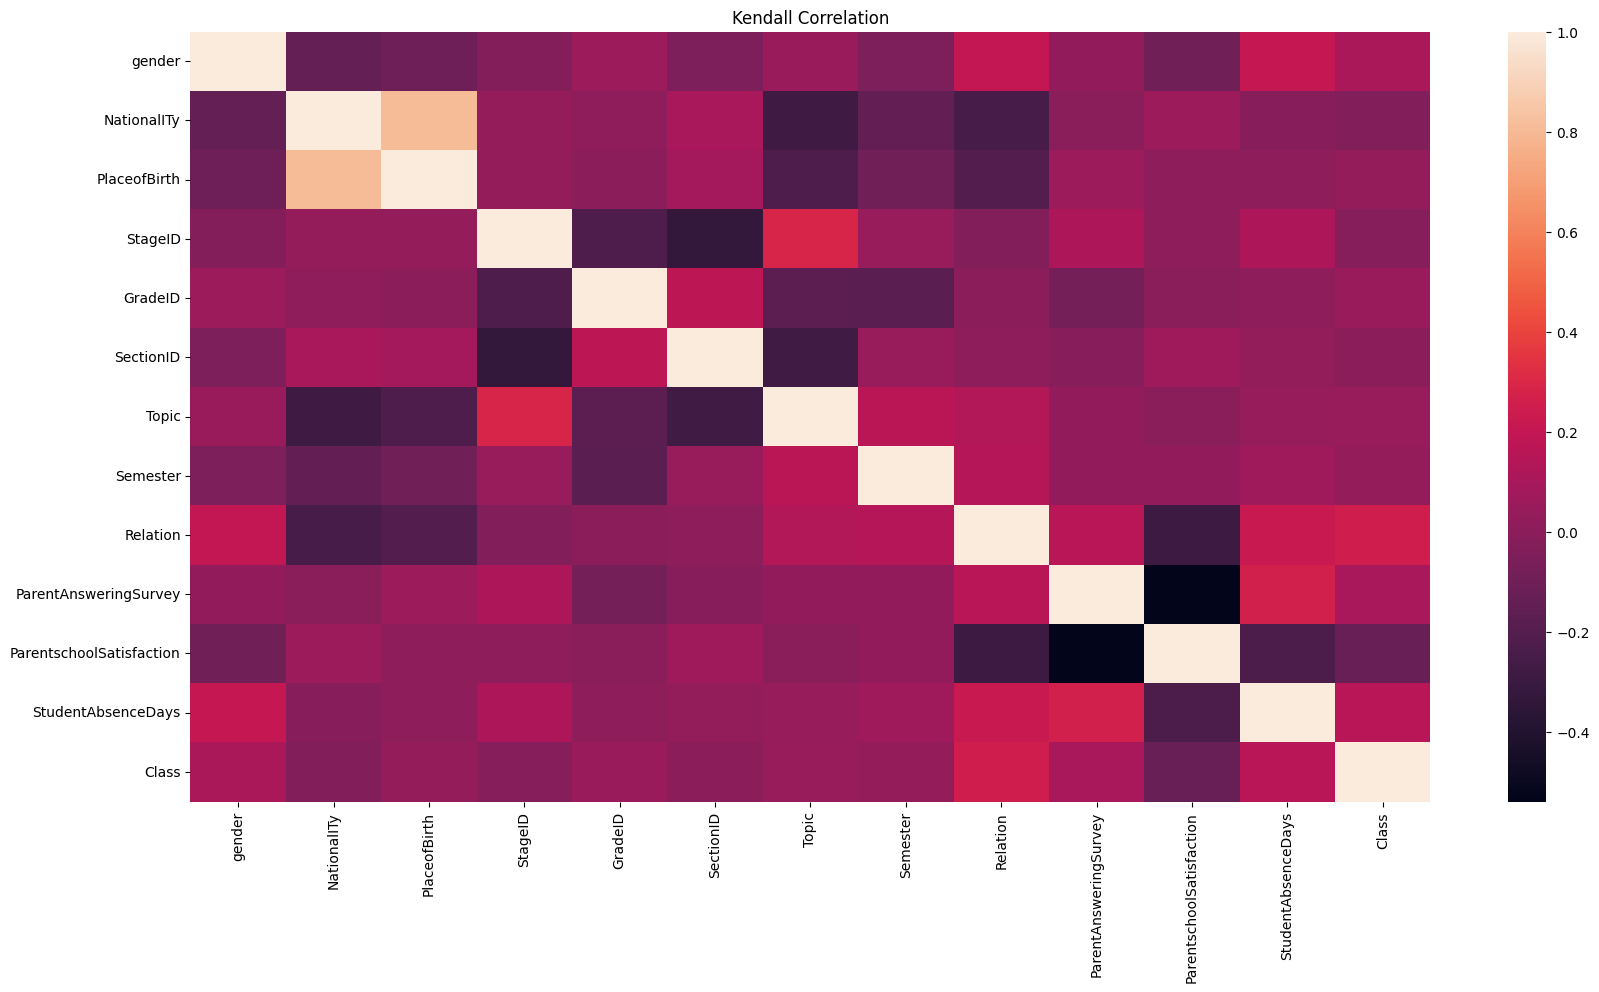

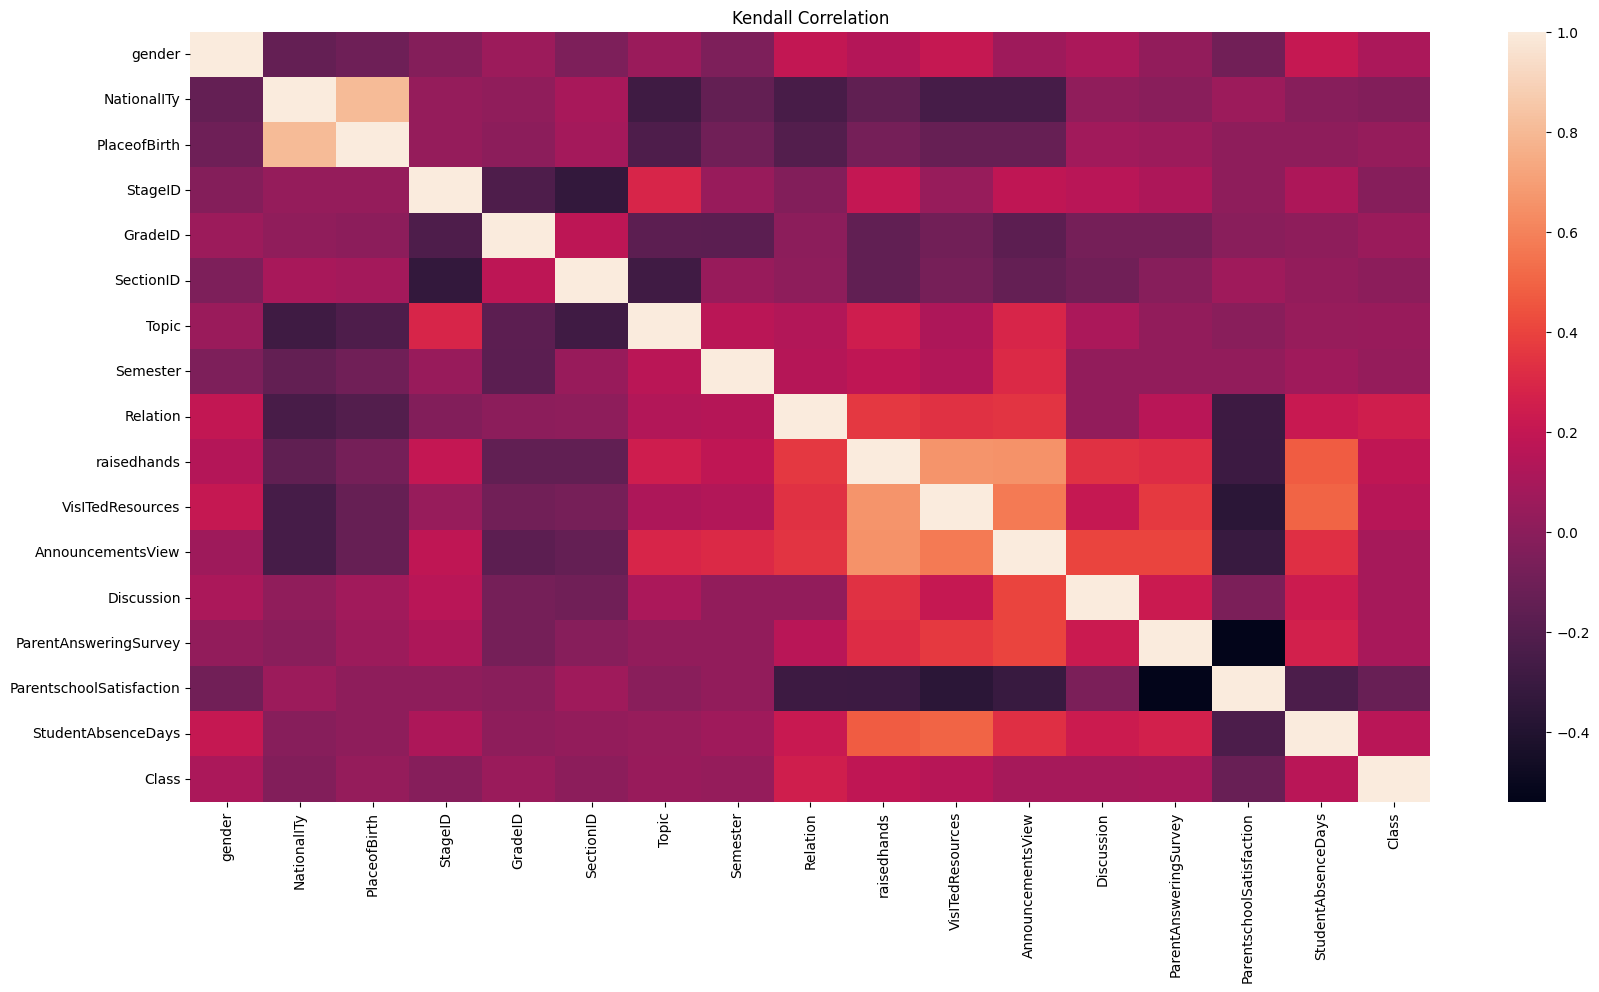

In [24]:
# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df_categorical.corr(method='spearman'))
plt.title('Kendall Correlation')
plt.show()

# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df5_numeric.corr(method='spearman'))
plt.title('Kendall Correlation')
plt.show()


/tmp/ipykernel_793/2467891984.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numeric['raisedhands'], ax=ax[0, 0])
/tmp/ipykernel_793/2467891984.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numeric['VisITedResources'], ax=ax[0, 1])
/tmp/ipykernel_793/2467891984.py:6: UserWar

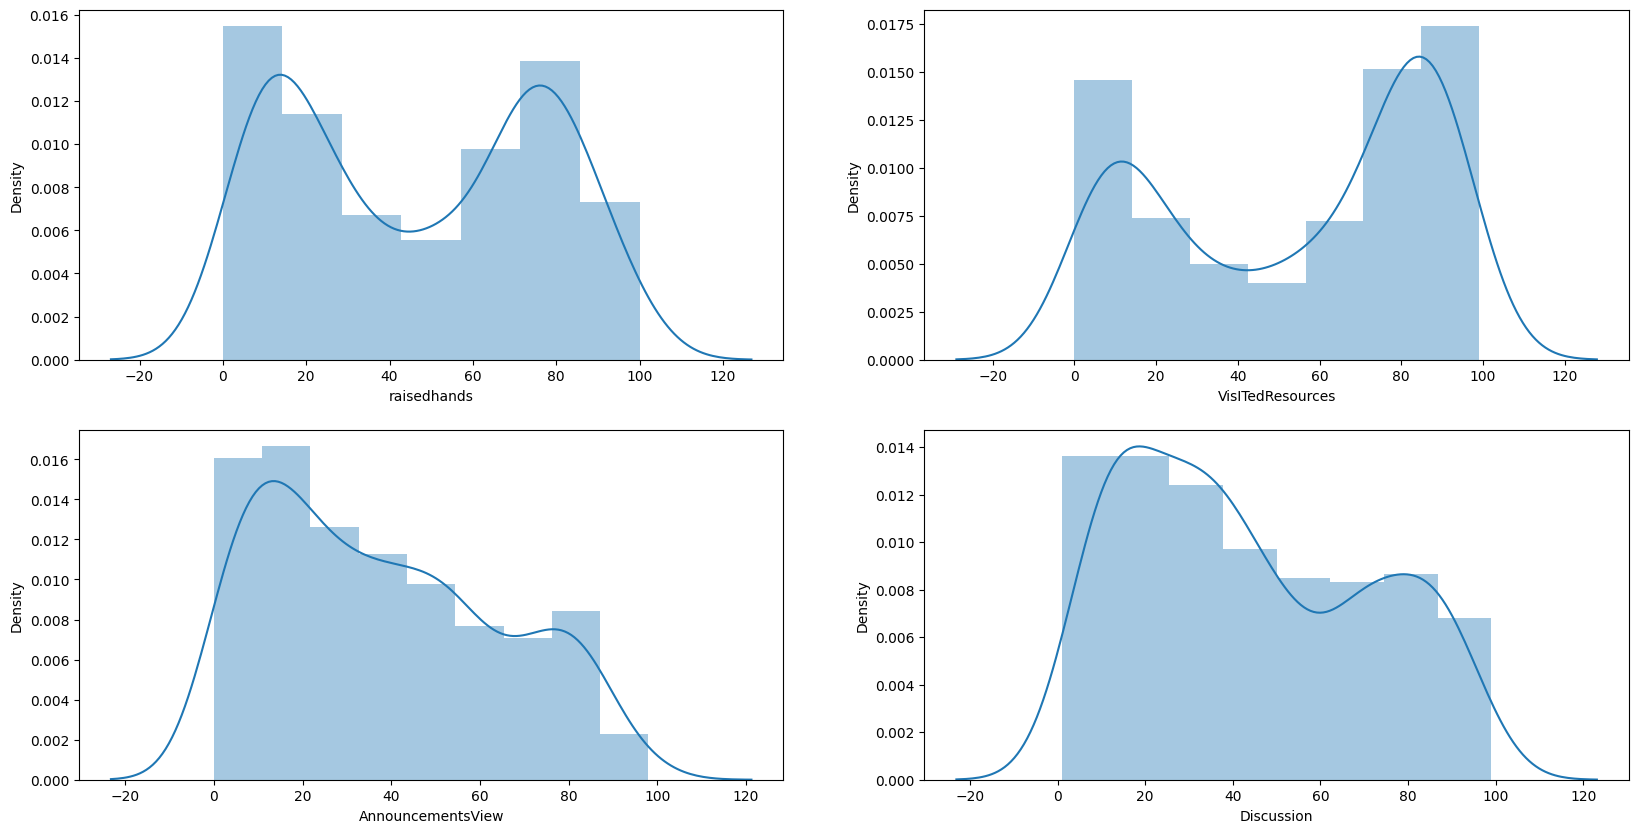

In [25]:
# plot histogram and probability density function

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(data_numeric['raisedhands'], ax=ax[0, 0])
sns.distplot(data_numeric['VisITedResources'], ax=ax[0, 1])
sns.distplot(data_numeric['AnnouncementsView'], ax=ax[1, 0])
sns.distplot(data_numeric['Discussion'], ax=ax[1, 1])
plt.show()

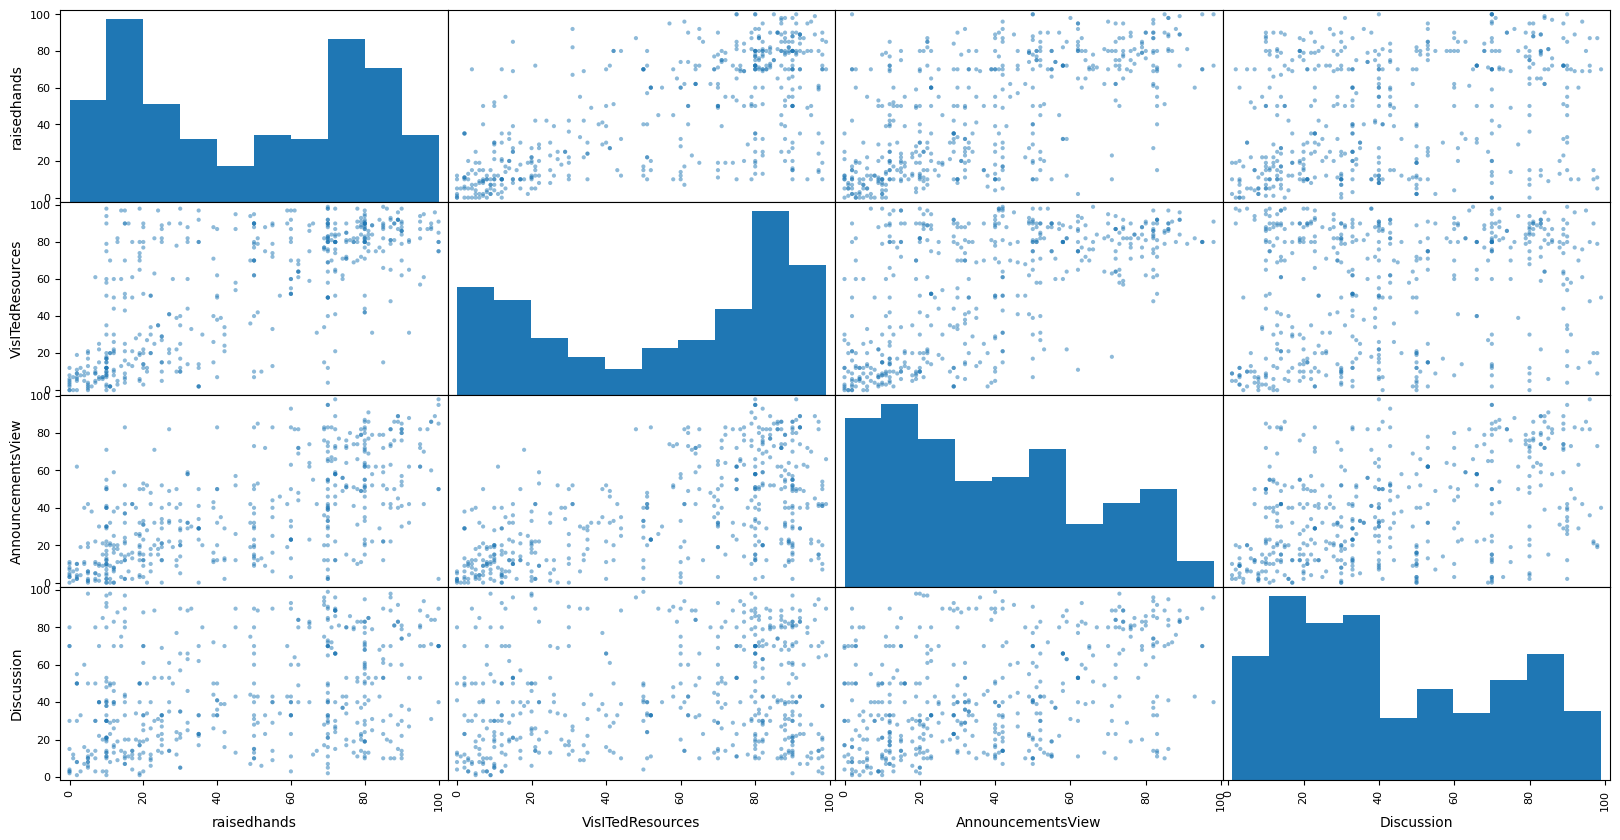

In [26]:
# scatter plot of numeric data
pd.plotting.scatter_matrix(data_numeric, figsize=(20, 10))
plt.show()

/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


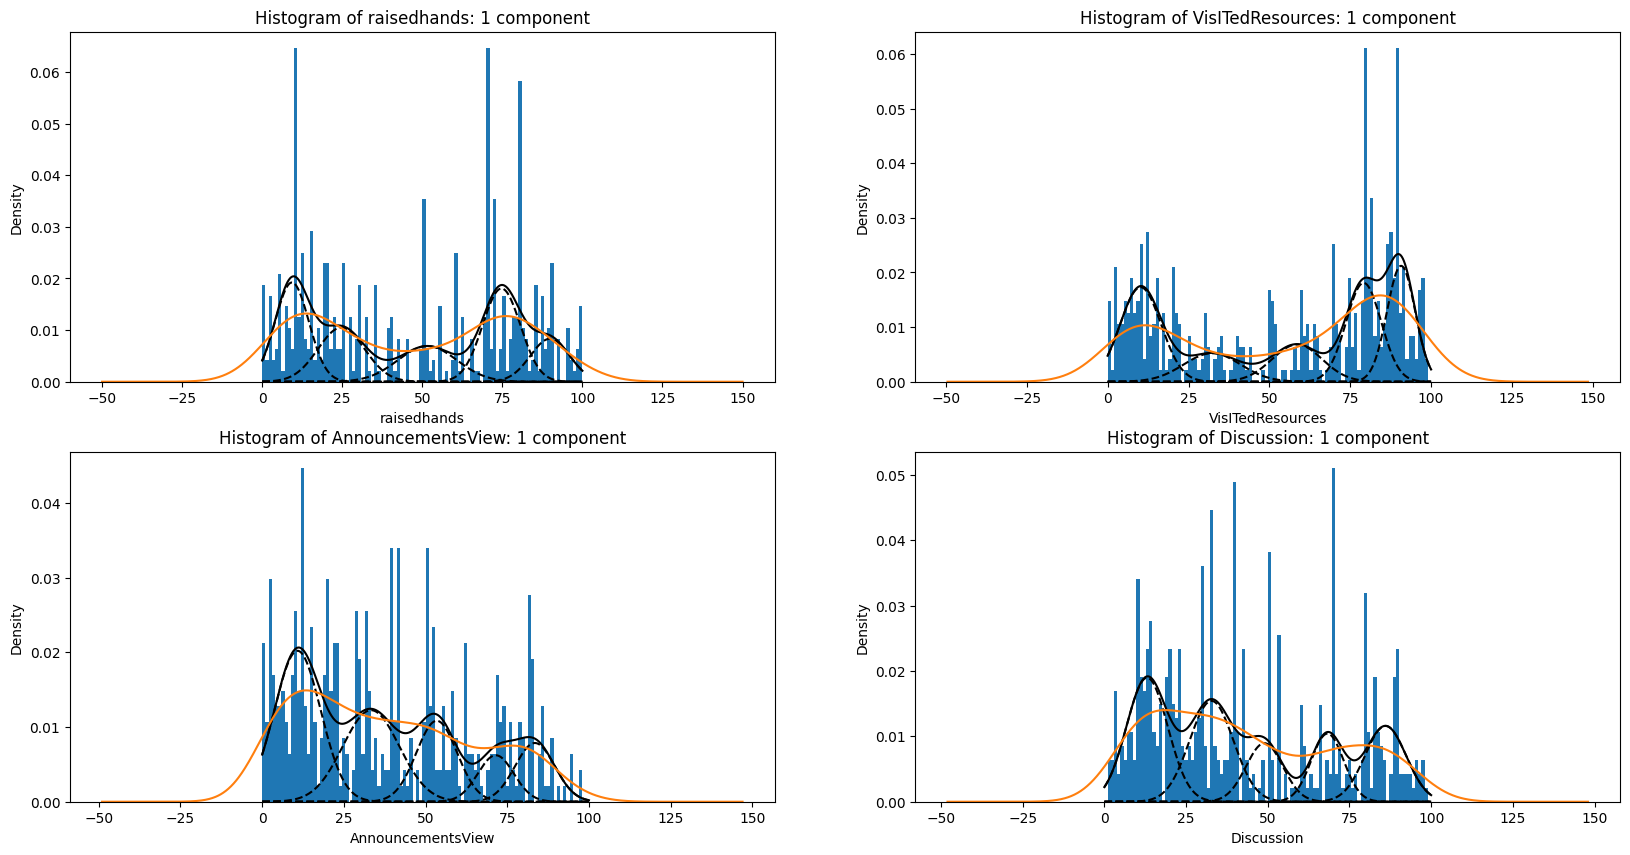

In [27]:
## estimate a GMM model on numeric data
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(data_numeric[['raisedhands']])
# plot the probability density functions of the GMM model with the histogram of the data
x = np.linspace(0, 100, 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
# plt.figure(figsize=(20, 10))
# plt.hist(data_numeric['raisedhands'], 100, density=True)
# plt.plot(x, pdf, '-k')
# plt.plot(x, pdf_individual, '--k')
# plt.xlabel('raisedhands')
# plt.ylabel('Probability')
# plt.title('Histogram of raisedhands: 1 component')
# plt.show()


# do the above for all numeric data
gmms = []
for column in data_numeric.columns:
    gmm = GaussianMixture(n_components=5, covariance_type='full')
    gmm.fit(data_numeric[[column]])
    gmms.append(gmm)

# plot the probability density functions of the GMM model with the histogram of the data as subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
for i, column in enumerate(data_numeric.columns):
    x = np.linspace(0, 100, 1000)
    logprob = gmms[i].score_samples(x.reshape(-1, 1))
    responsibilities = gmms[i].predict_proba(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    axs[i//2, i%2].hist(data_numeric[column], 100, density=True)
    axs[i//2, i%2].plot(x, pdf, '-k')
    axs[i//2, i%2].plot(x, pdf_individual, '--k')
    axs[i//2, i%2].set_xlabel(column)
    axs[i//2, i%2].set_ylabel('Probability')
    # plot original probability density function kind='density'
    data_numeric[column].plot(kind='density', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Histogram of {}: 1 component'.format(column))
plt.show()

In [28]:
# convert categorical data to frequency values
data_categorical = data_categorical.apply(lambda x: x.value_counts())
# data_categorical

# create expected value contingency table
expected = pd.DataFrame()
for column in data_categorical.columns:
    expected[column] = data_categorical[column] / data_categorical[column].sum()
expected


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0.635417,0.022917,0.033333,0.414583,0.241667,0.589583,0.039583,0.510417,0.589583,0.4375,0.608333,0.397917,0.439583
1,0.364583,0.358333,0.366667,0.516667,0.006250,0.347917,0.197917,0.489583,0.410417,0.5625,0.391667,0.602083,0.264583
2,NaN,0.012500,0.012500,0.068750,0.100000,0.062500,0.052083,NaN,NaN,NaN,NaN,NaN,0.295833
3,NaN,0.012500,0.033333,NaN,0.210417,NaN,0.135417,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.035417,0.039583,NaN,0.022917,NaN,0.062500,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.012500,0.012500,NaN,0.306250,NaN,0.050000,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.002083,0.002083,NaN,0.066667,NaN,0.122917,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.025000,0.018750,NaN,0.010417,NaN,0.093750,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.014583,0.012500,NaN,0.027083,NaN,0.043750,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0.008333,0.008333,NaN,0.008333,NaN,0.106250,NaN,NaN,NaN,NaN,NaN,NaN


chi2:  0.0
p:  1.0
dof:  1
ex:  [[0.5 0.5]
 [0.5 0.5]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.3333333

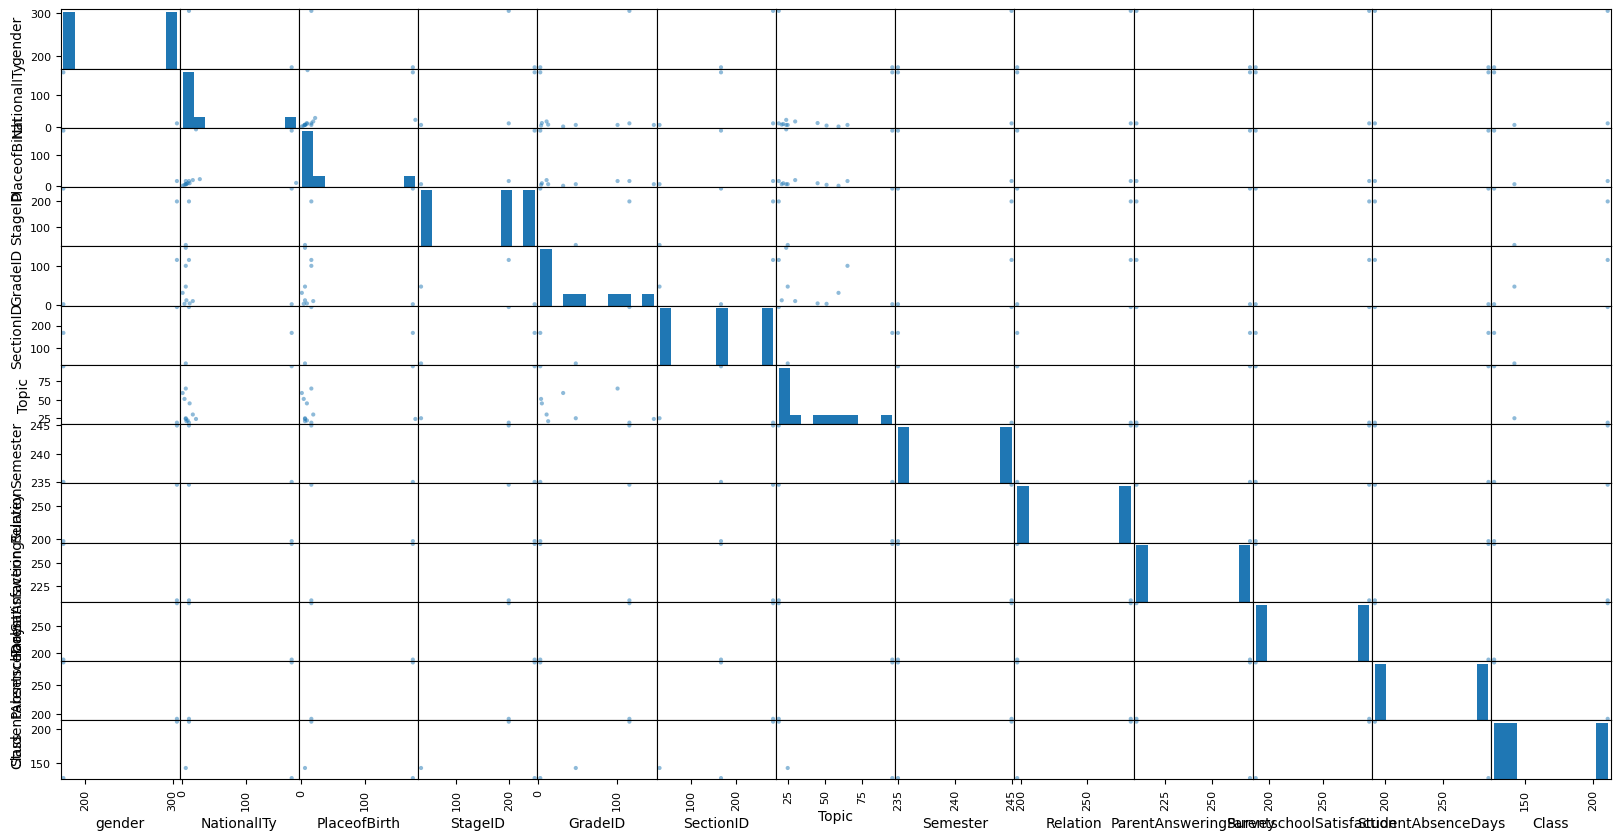

In [29]:
## chi-square test of independence for correlation between categorical data
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df = data_categorical.copy()

# calculate chi2 for each column
for column in df.columns:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Class'], df[column]))
    print('chi2: ', chi2)
    print('p: ', p)
    print('dof: ', dof)
    print('ex: ', ex)
    print('')

# plot scatter matrix
pd.plotting.scatter_matrix(data_categorical, figsize=(20, 10))
plt.show()


In [30]:
# do a normality check on the data
from scipy.stats import normaltest

for column in data_numeric.columns:
    stat, p = normaltest(data_numeric[column])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
    print('')


Statistics=4423.427, p=0.000
Probably not Gaussian

Statistics=4721.113, p=0.000
Probably not Gaussian

Statistics=109.707, p=0.000
Probably not Gaussian

Statistics=198.798, p=0.000
Probably not Gaussian



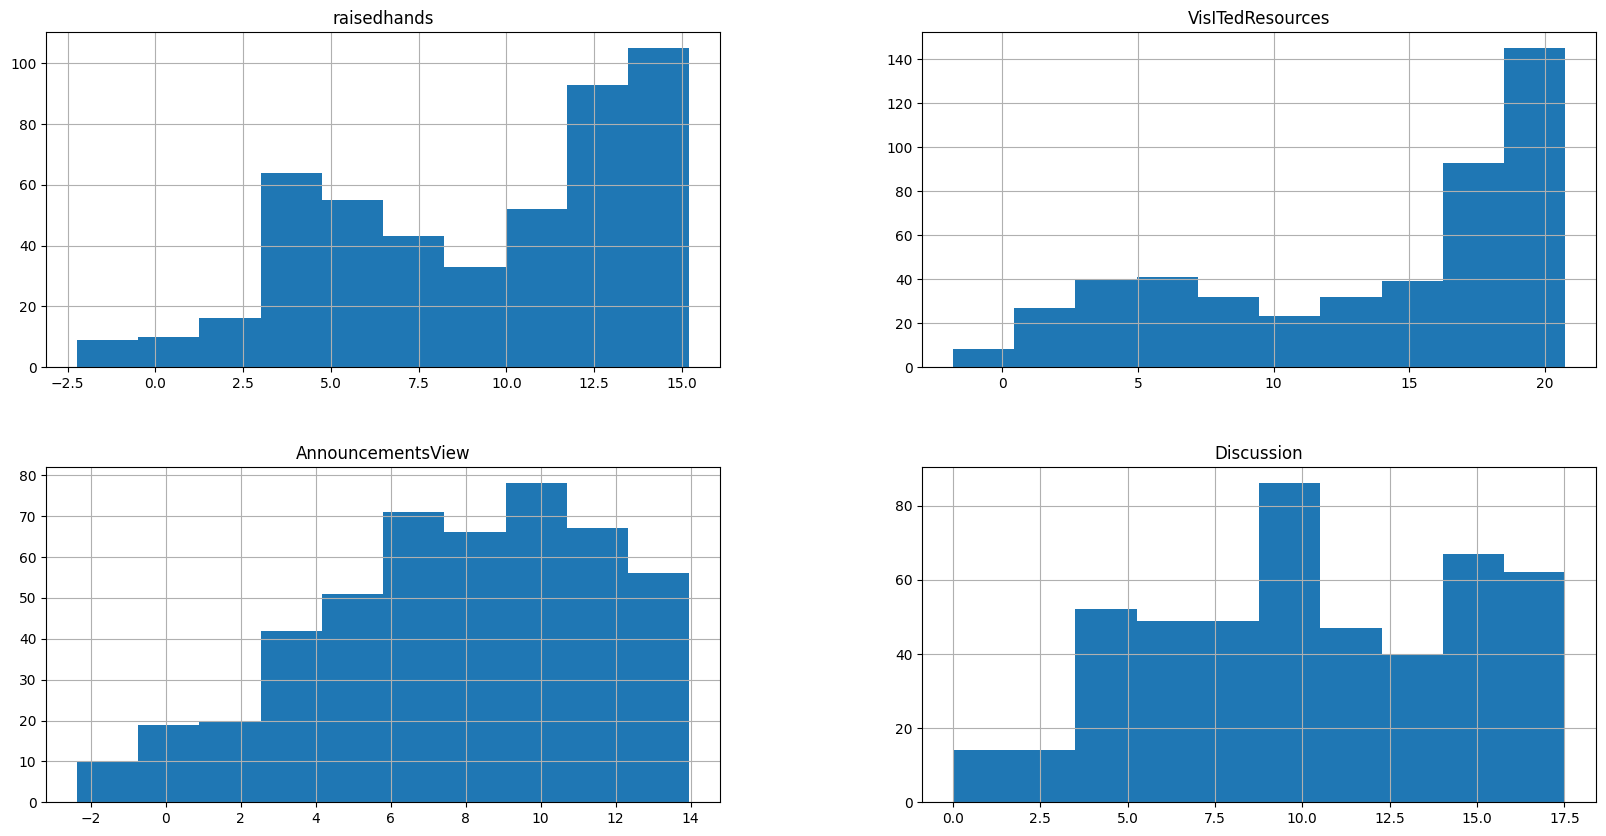

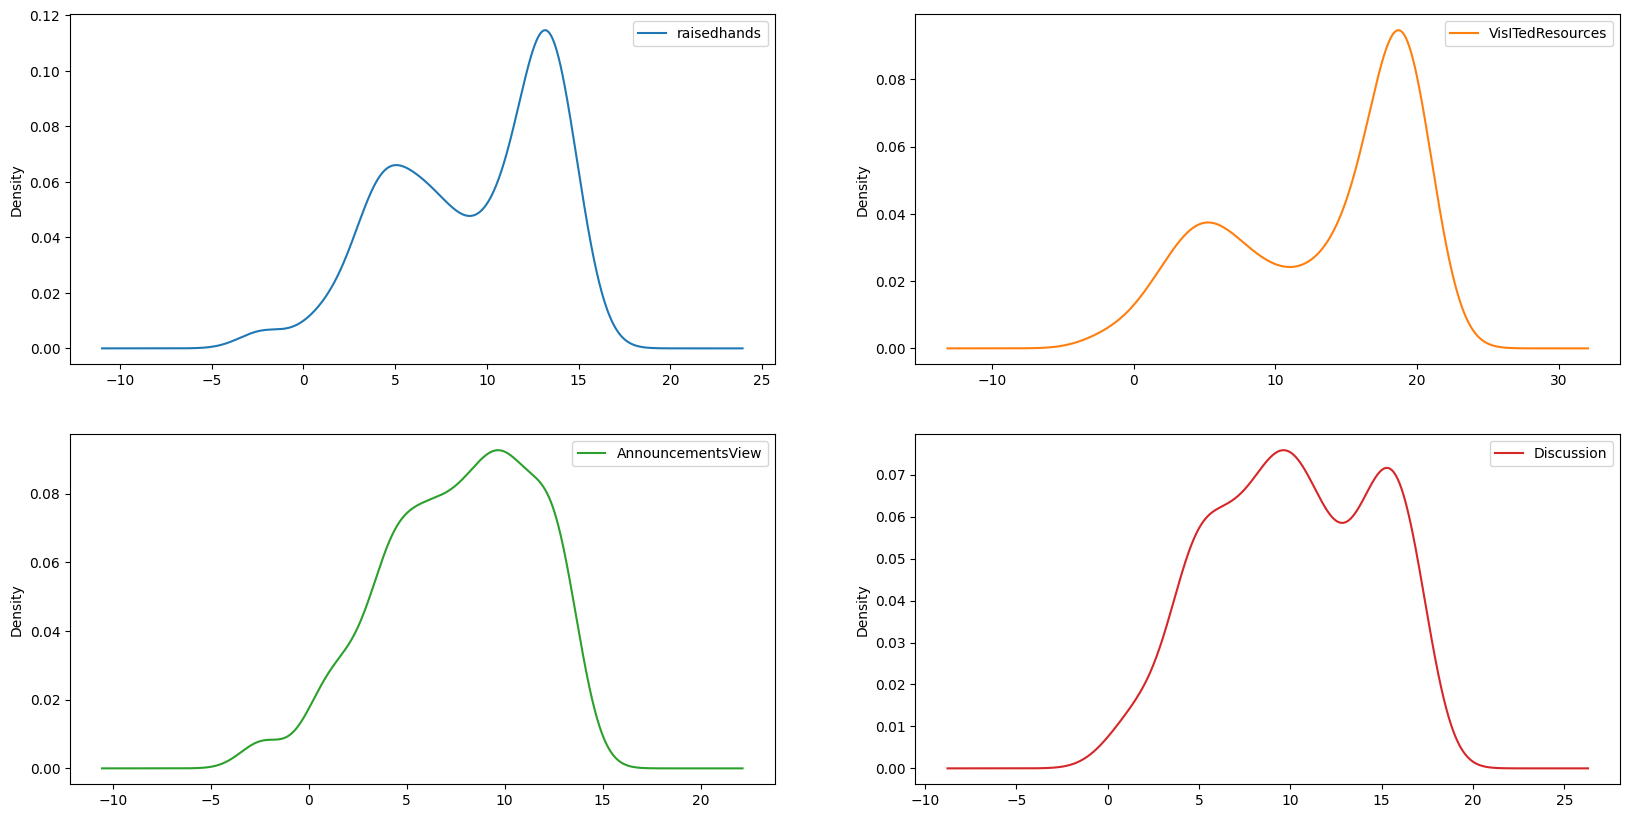

In [31]:
# box cox transform data
from scipy.stats import boxcox
 
normal_data = data_numeric.copy() + 1e-6
for column in normal_data.columns:
    normal_data[column], _ = boxcox(normal_data[column])
normal_data.head()

# plot histogram of numeric data
normal_data.hist(figsize=(20, 10))
plt.show()

# extimate a probability density function
normal_data.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(20, 10))
plt.show()

/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


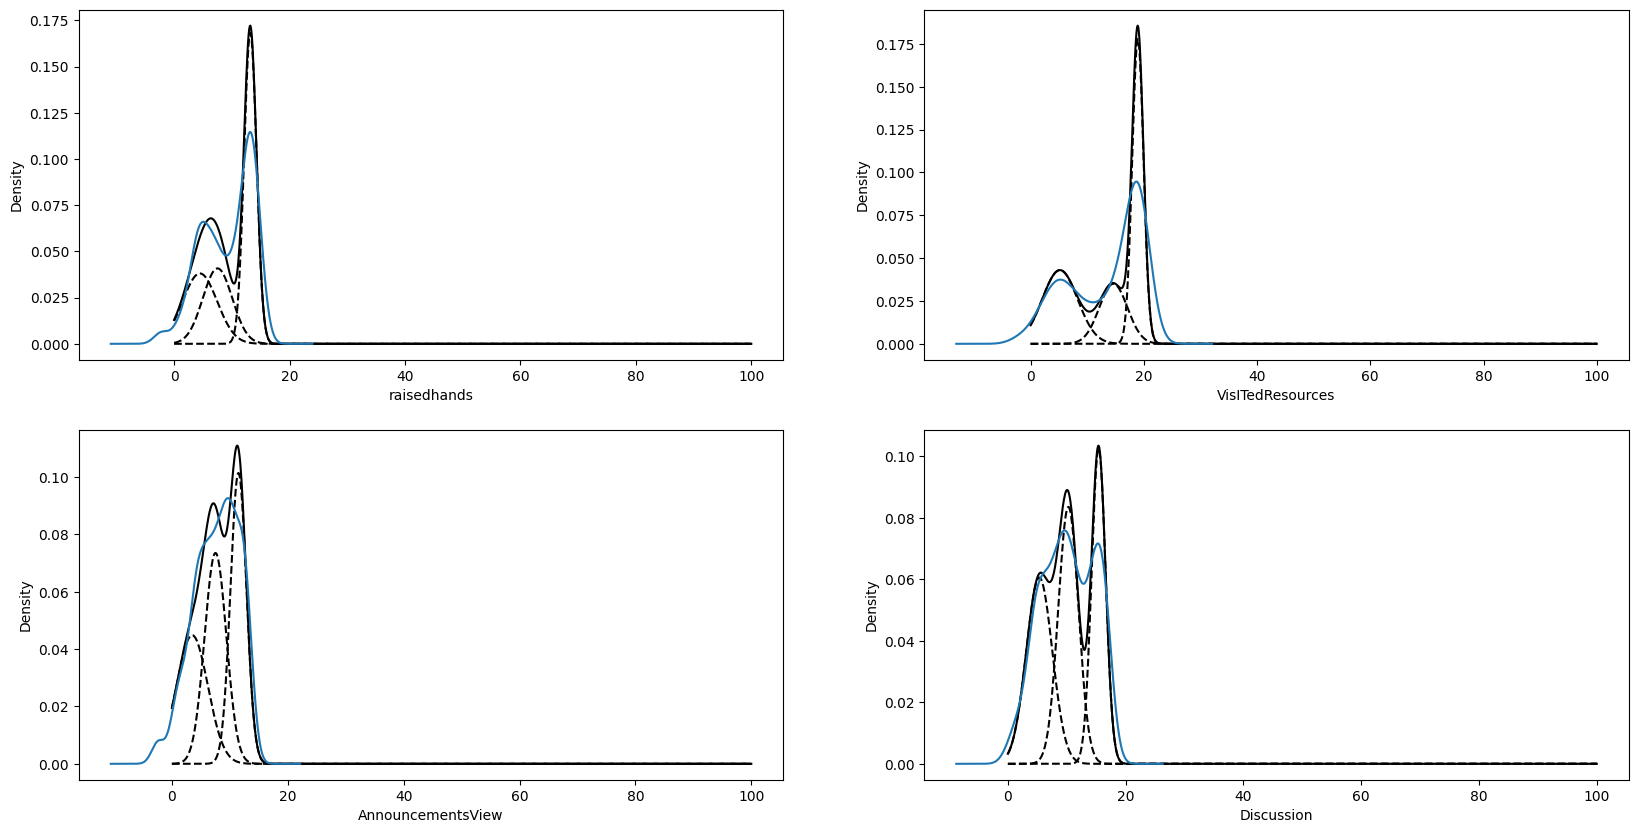

In [32]:
# fit GMM to transformed data
gmms = []
for column in normal_data.columns:
    gmm = GaussianMixture(n_components=3, covariance_type='full')
    gmm.fit(normal_data[[column]])
    gmms.append(gmm)

# plot the probability density functions of the GMM model with the histogram of the data as subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
for i, column in enumerate(normal_data.columns):
    x = np.linspace(0, 100, 1000)
    logprob = gmms[i].score_samples(x.reshape(-1, 1))
    responsibilities = gmms[i].predict_proba(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    # axs[i//2, i%2].hist(data_numeric[column], 100, density=True)
    axs[i//2, i%2].plot(x, pdf, '-k')
    axs[i//2, i%2].plot(x, pdf_individual, '--k')
    axs[i//2, i%2].set_xlabel(column)
    axs[i//2, i%2].set_ylabel('Probability')
    # plot original probability density function kind='density'
    normal_data[column].plot(kind='density', ax=axs[i//2, i%2])
    # axs[i//2, i%2].set_title('Histogram of {}: 1 component'.format(column))
plt.show()


In [34]:
data_numeric

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


In [44]:
# logisitic regression on the data
data_logistic = data_numeric.copy()
data_logistic['Class'] = data['Class']
data_logistic

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M
...,...,...,...,...,...
475,5,4,5,8,L
476,50,77,14,28,M
477,55,74,25,29,M
478,30,17,14,57,L


In [63]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

X = data_logistic.drop('Class', axis=1)
# convert class to numeric
y = data_logistic['Class'].apply(lambda x: 0 if x == 'L' else 1 if x == 'M' else 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# show data distribution
print(y_train.value_counts())
print(y_test.value_counts())

Class
1    163
2    120
0    101
Name: count, dtype: int64
Class
1    48
0    26
2    22
Name: count, dtype: int64


LR: 0.625169 (0.046603)
LDA: 0.619973 (0.061178)
QDA: 0.601889 (0.053032)
KNN: 0.653779 (0.073910)
CART: 0.617611 (0.070355)
NB: 0.622672 (0.066366)
SVM: 0.437517 (0.025320)
RF: 0.630702 (0.068741)


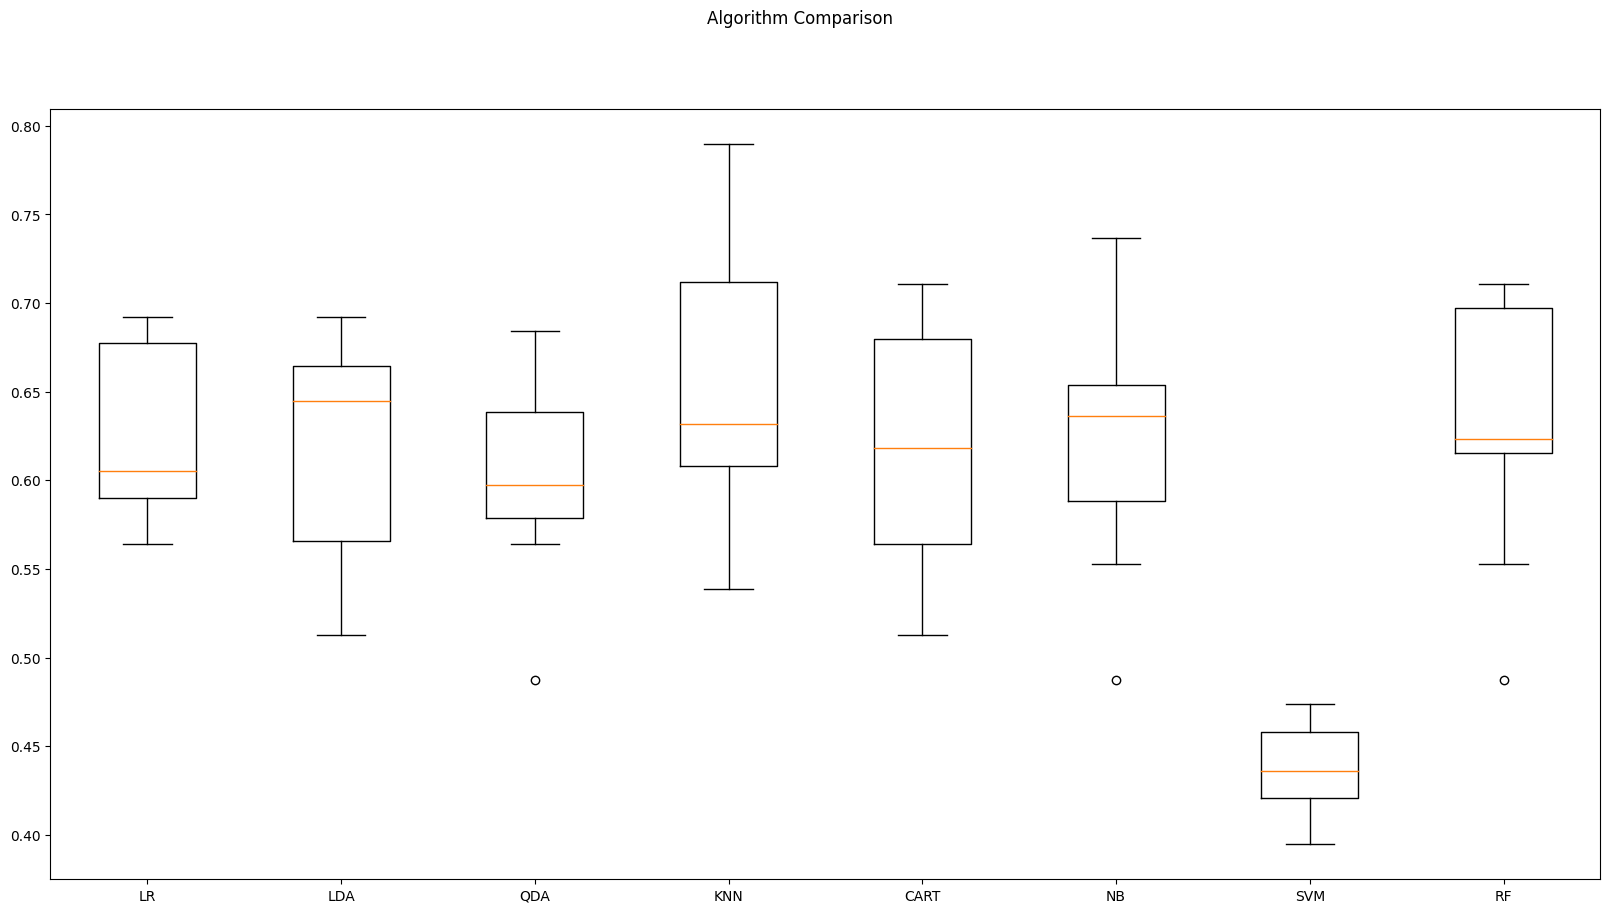

In [73]:
# run multiple multi class classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

# evaluate each model in turn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# compare algorithms
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


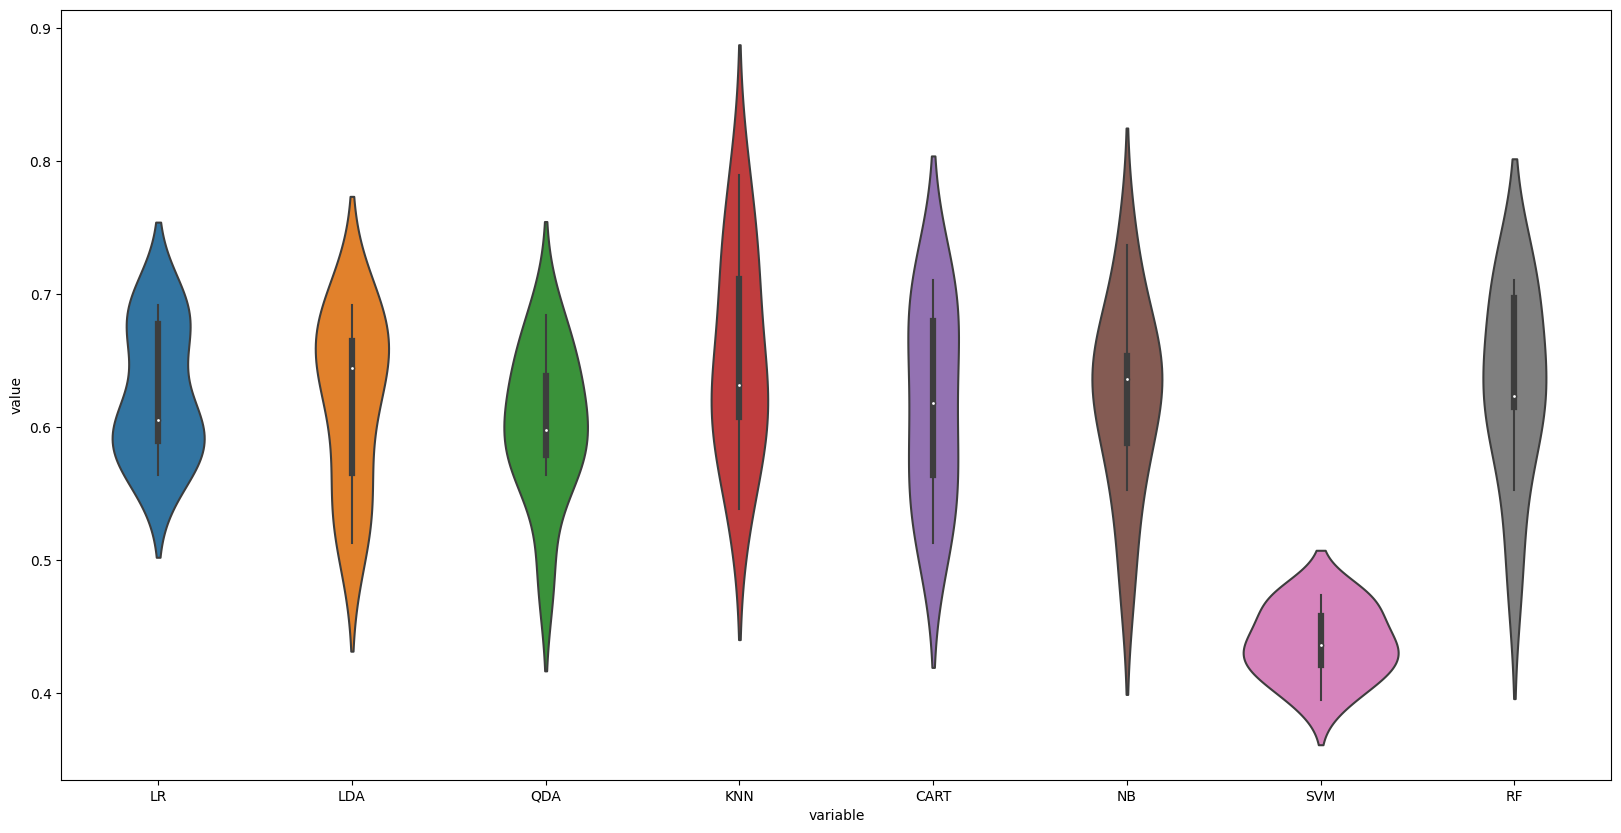

In [74]:
# compare algorithms with violin plot using sns
import seaborn as sns

df = pd.DataFrame(results).T
df.columns = names
df = pd.melt(df, value_vars=names)
fig = plt.figure(figsize=(20, 10))
sns.violinplot(x='variable', y='value', data=df)
plt.show()


Class
1    163
2    120
0    101
Name: count, dtype: int64
Class
1    48
0    26
2    22
Name: count, dtype: int64
LR: 0.674291 (0.063396)
LDA: 0.682186 (0.053024)
QDA: 0.632861 (0.085090)
KNN: 0.543995 (0.060801)
CART: 0.681781 (0.087267)
NB: 0.667139 (0.071147)
SVM: 0.582928 (0.085621)
RF: 0.684885 (0.060075)


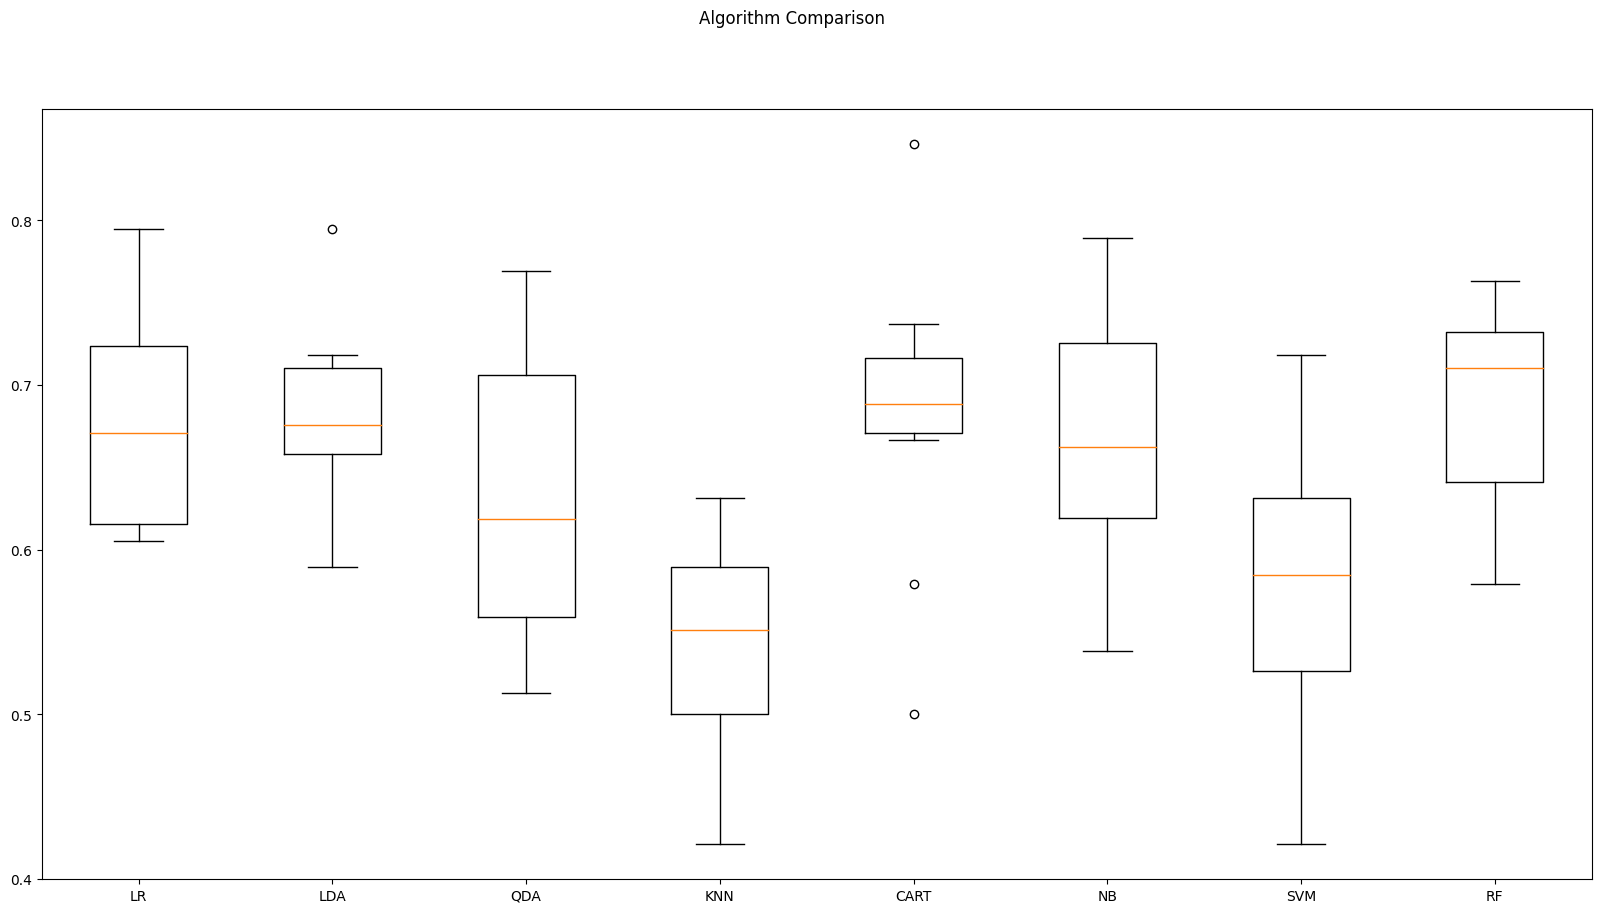

In [79]:
# use categorical data for classification
df_categorical_logistic = df_categorical.copy()
df_categorical_logistic['Class'] = data['Class']

# split data into train and test sets
from sklearn.model_selection import train_test_split

X = df_categorical_logistic.drop('Class', axis=1)
# convert class to numeric
y = df_categorical_logistic['Class'].apply(lambda x: 0 if x == 'L' else 1 if x == 'M' else 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# show data distribution
print(y_train.value_counts())
print(y_test.value_counts())

# run multiple multi class classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

# evaluate each model in turn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# compare algorithms
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

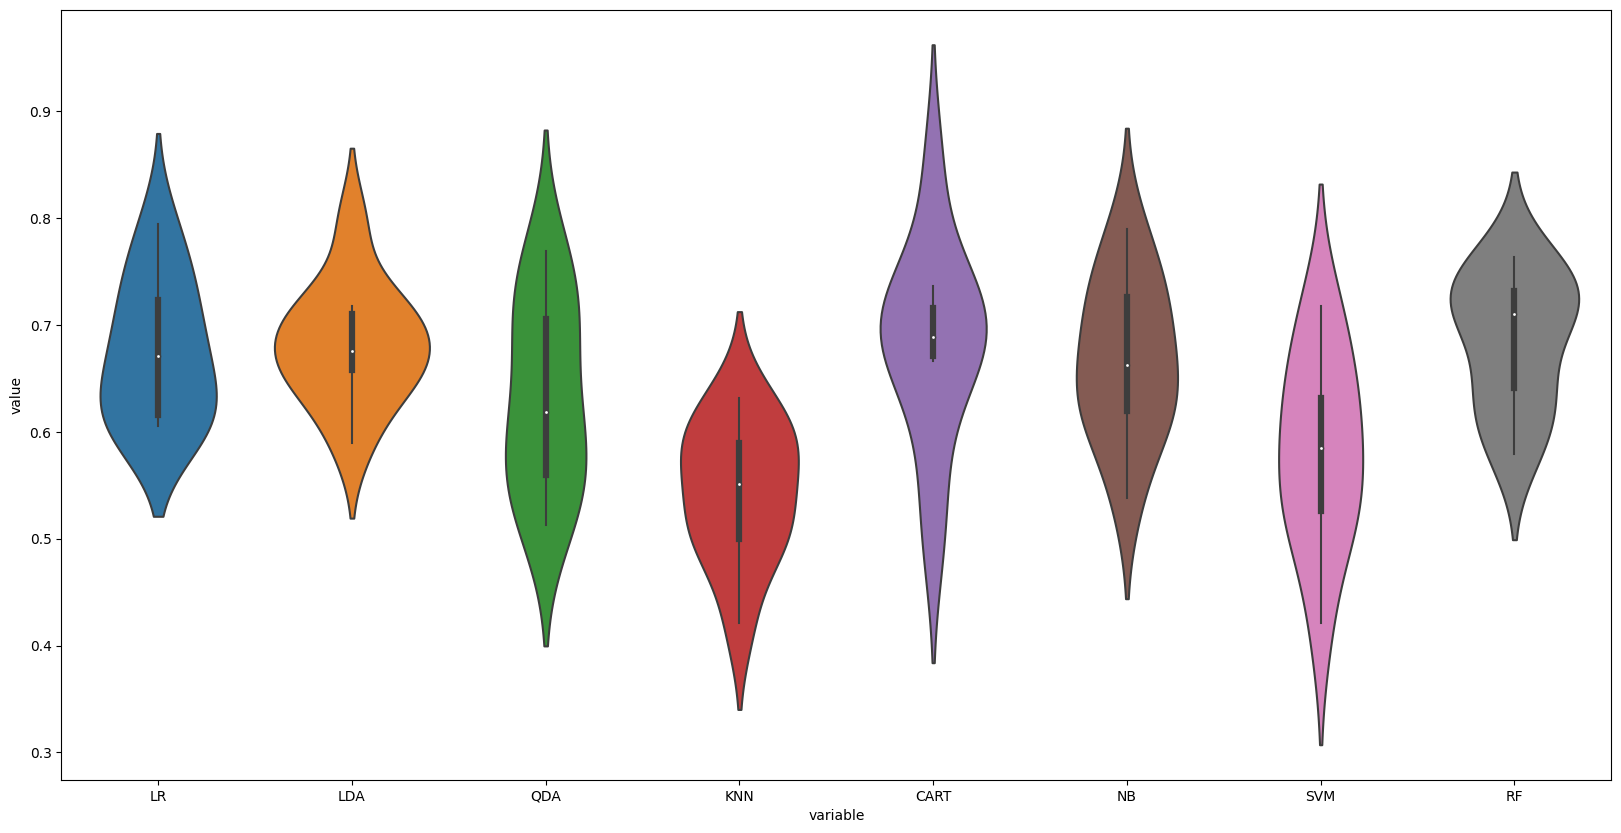

In [80]:
# compare algorithms with violin plot using sns
import seaborn as sns

df = pd.DataFrame(results).T
df.columns = names
df = pd.melt(df, value_vars=names)
fig = plt.figure(figsize=(20, 10))
sns.violinplot(x='variable', y='value', data=df)
plt.show()
